In [9]:
# connecting to my google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd

df = pd.read_excel("/content/drive/MyDrive/normalized_topics_and_clusters_0.5.xlsx")

print(df.columns)

Index(['year', 'Paramilitary Activities', 'Paramilitary Decomissioning',
       'Prisoner Releases', 'Extradition', 'policing', 'Border Checkpoints',
       'North-South Coperation', 'Anglo-Irish Agreement', 'Anglo-Irish Trade',
       'Irish Language and Culture', 'Irish Citizenship', 'Irish Language',
       'Peace Proces Initatives', 'Human Rights',
       'Paramilitary Violence and Ceasfire',
       'Relations: North-South & Anglo-Irish Relations',
       'Irish Language and Culture.1', 'Peace Proces Initatives.1'],
      dtype='object')


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [12]:
# Convert 'year' column to string type to handle mixed data types
df['year'] = df['year'].astype(str)

# Attempt to convert to datetime, handling errors
df['year'] = pd.to_datetime(df['year'], format='%Y', errors='coerce')

In [13]:
cluster_map = {
    "Paramilitary Violence and Ceasfire" :[
      "Paramilitary Decomissioning",
      "Prisoner Releases",
      "Extradition",
      "policing",
      "Border Checkpoints",
      "Paramilitary Activities"

    ],
    "Relations: North-South & Anglo-Irish Relations" :[
      "North-South Coperation",
      "Anglo-Irish Agreement",
      "Anglo-Irish Trade"
    ],
    "Irish Language and Culture" :[
      "Irish Language and Culture",
      "Irish Citizenship",
      "Irish Language"
    ],
    "Peace Proces Initatives" :[
      "Peace Proces Initatives",
      "Human Rights"
    ]
}
cluster_names = list(cluster_map.keys())


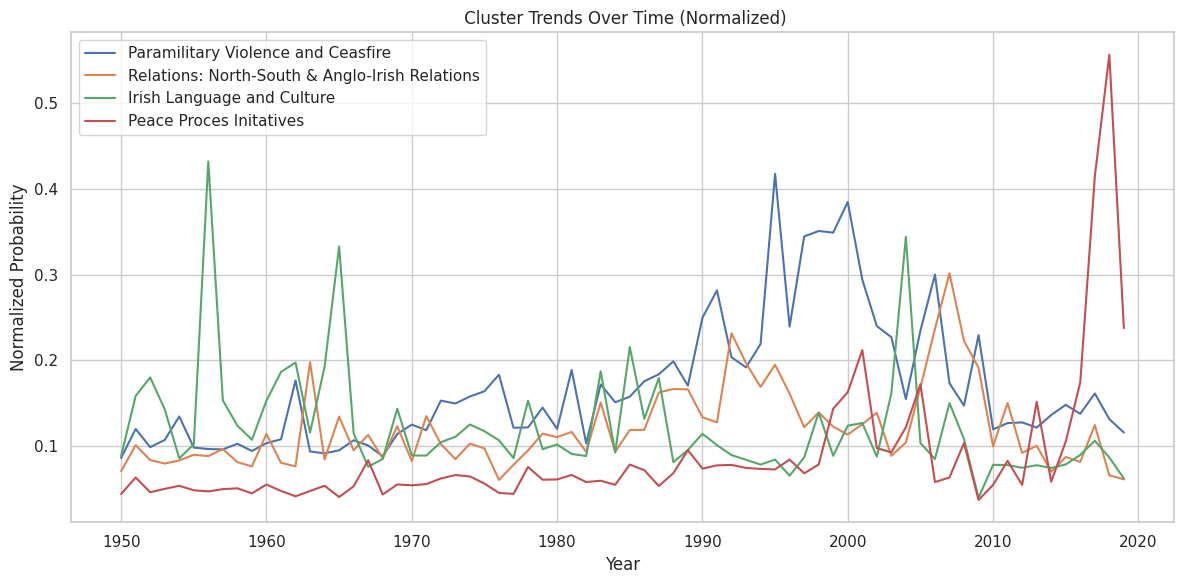

In [14]:
plt.figure(figsize=(12, 6))
for cluster_name, topics in cluster_map.items():
    # Calculate the mean value for the cluster topics for each year
    cluster_data = df[topics].mean(axis=1)
    # Plot the cluster data
    sns.lineplot(x=df['year'], y=cluster_data, label=cluster_name)

plt.xlabel("Year")
plt.ylabel("Normalized Probability")
plt.title(" Cluster Trends Over Time (Normalized)")
plt.legend()
plt.tight_layout()
plt.show()

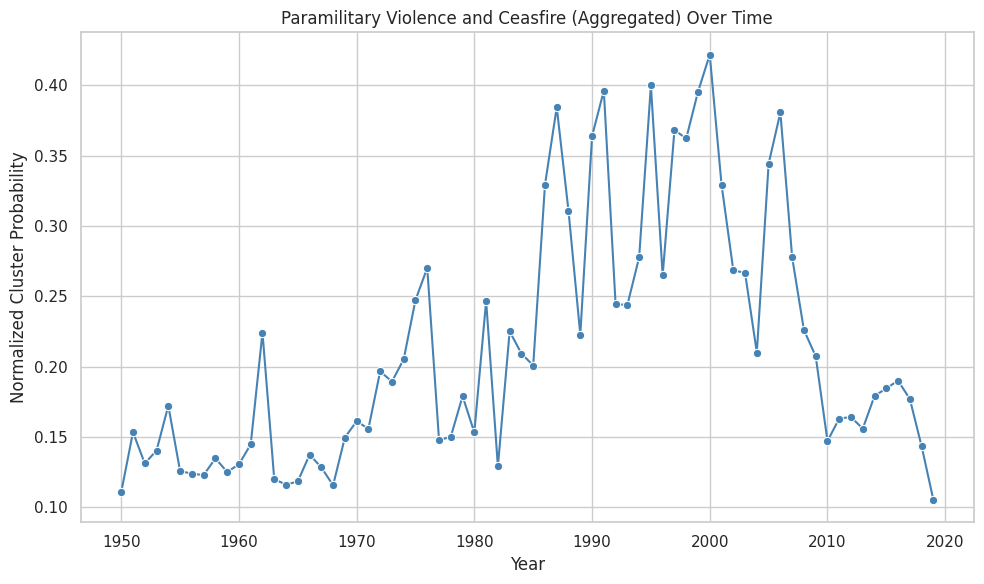

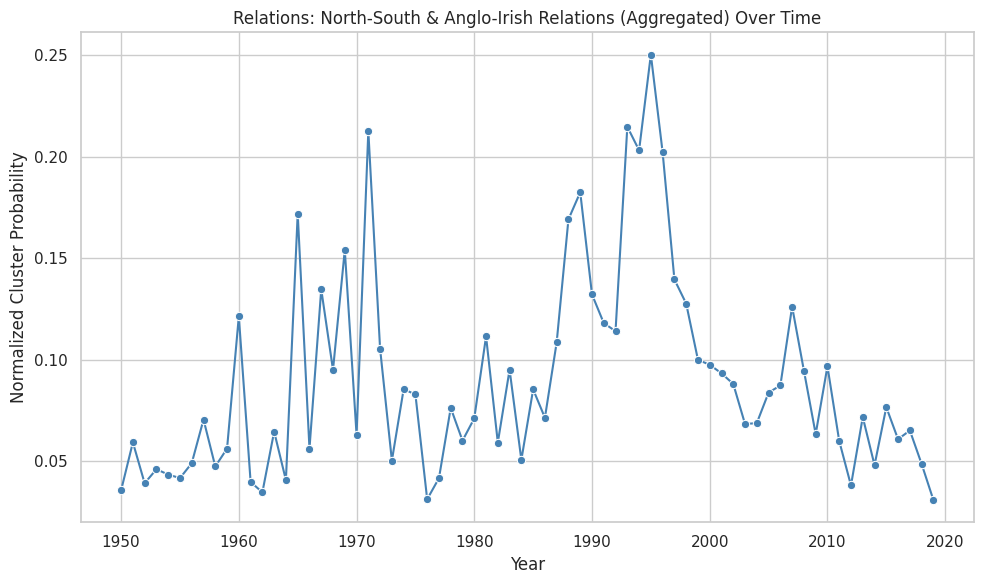

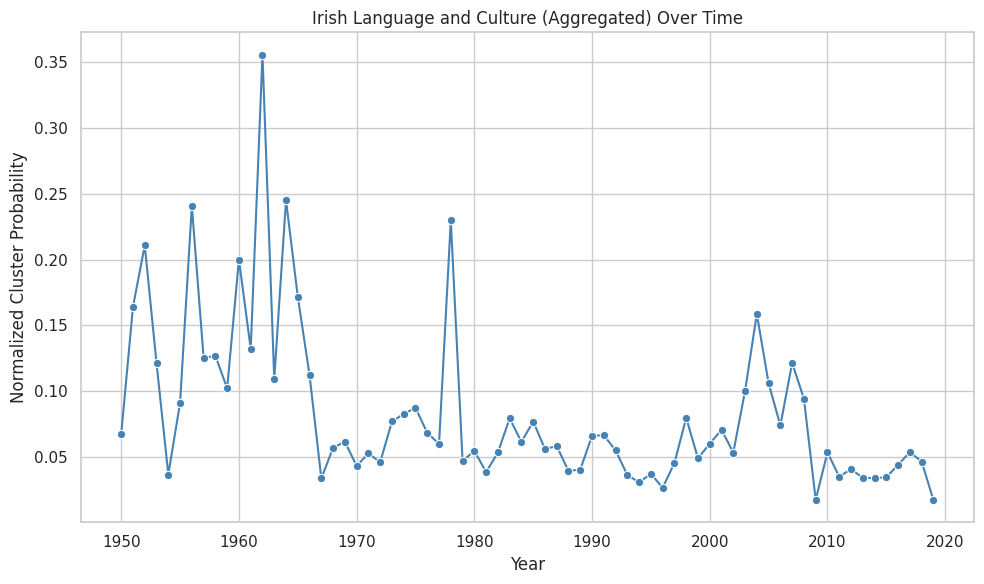

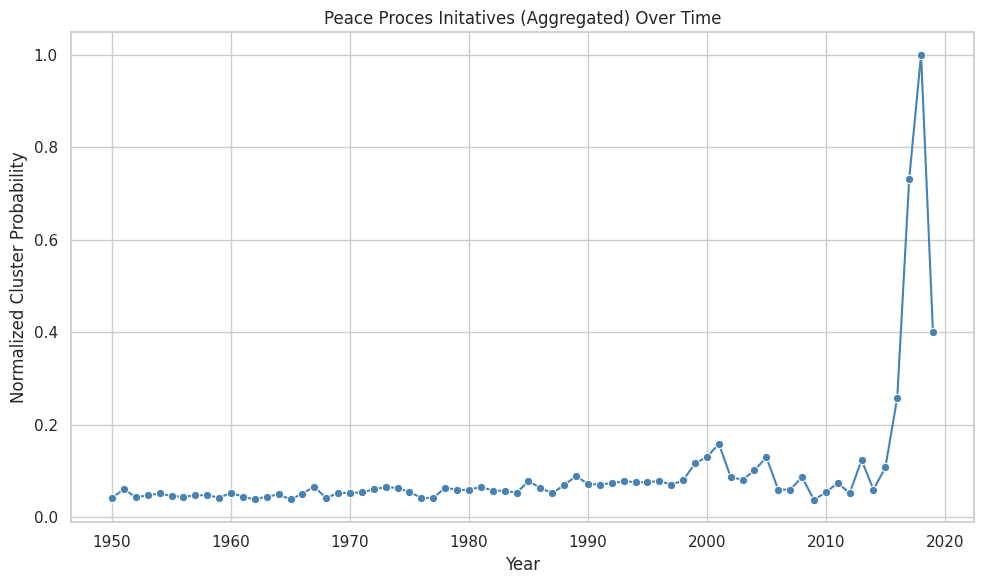

In [15]:
for cluster in cluster_names:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='year', y=cluster, marker='o', color='steelblue')
    plt.xlabel('Year')
    plt.ylabel('Normalized Cluster Probability')
    plt.title(f'{cluster} (Aggregated) Over Time')
    plt.tight_layout()
    plt.show()

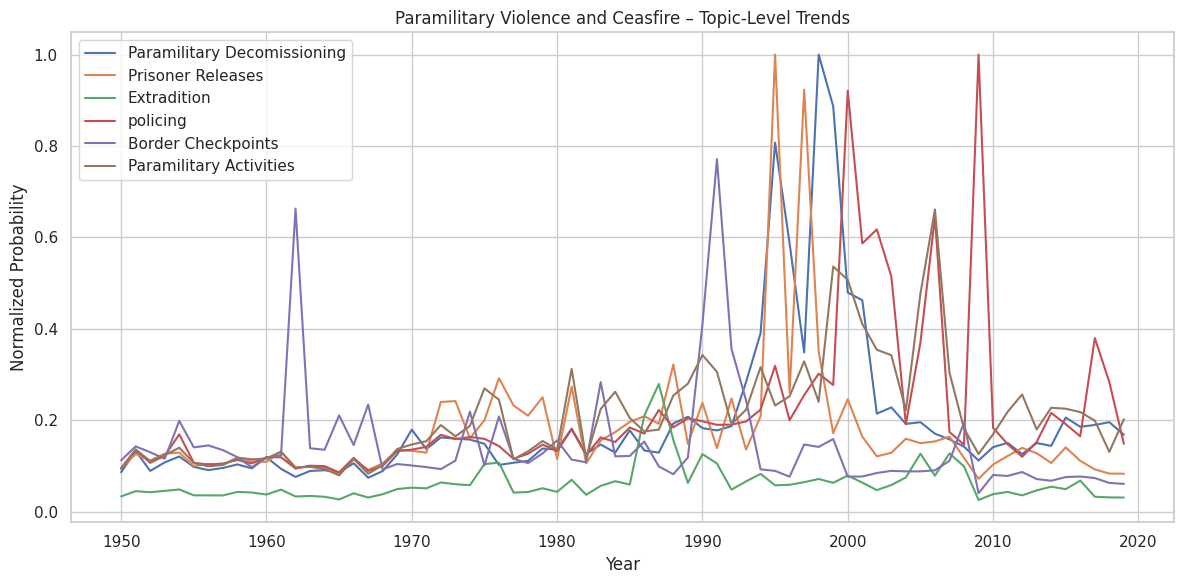

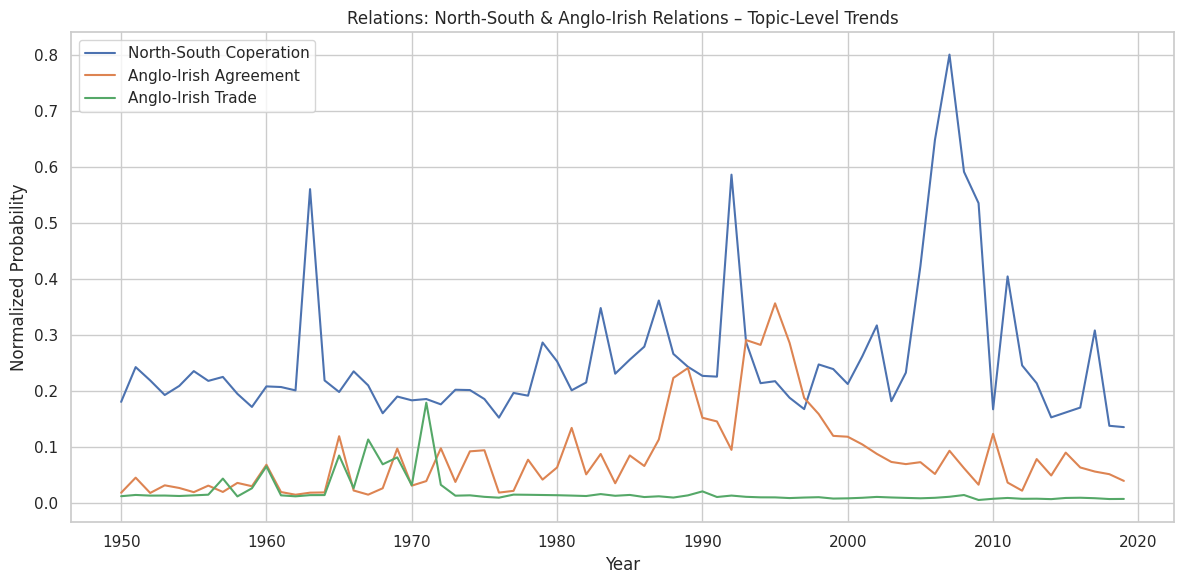

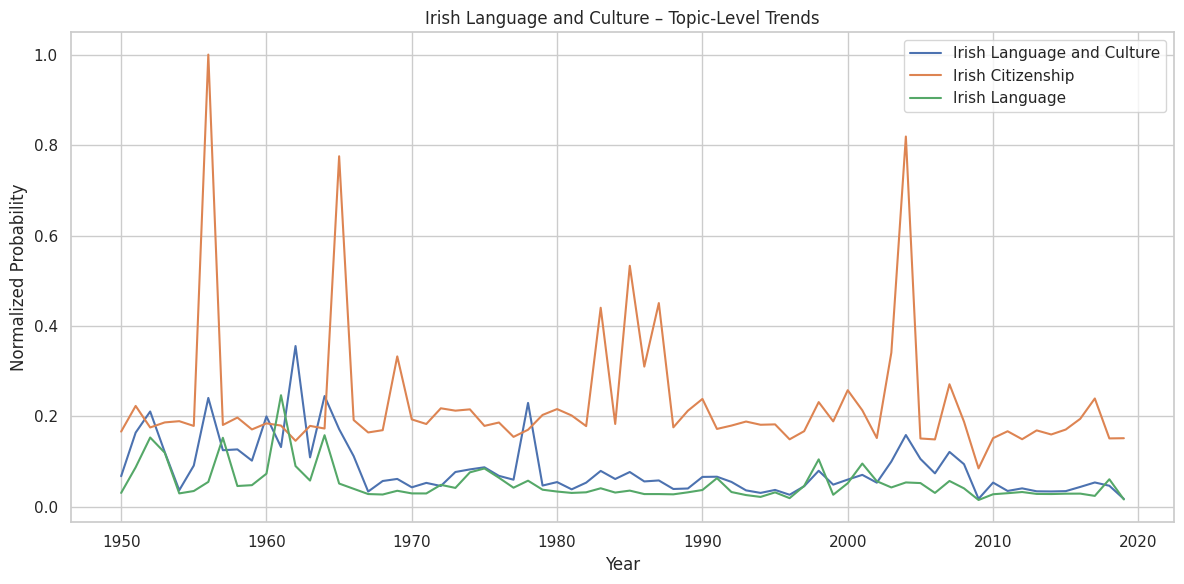

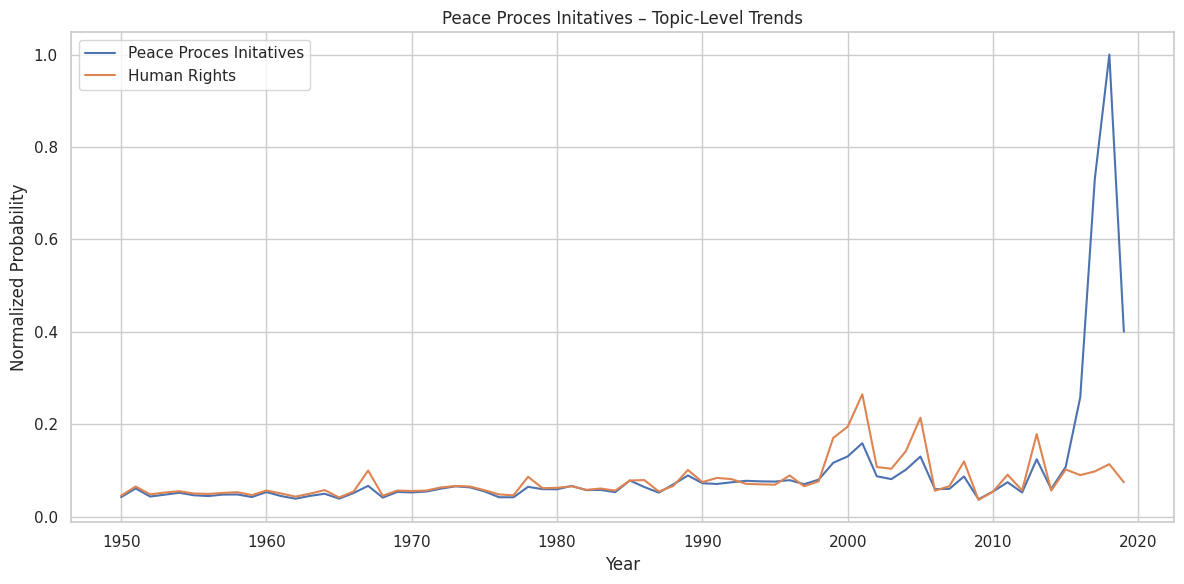

In [16]:
for cluster_name, topics in cluster_map.items():
    plt.figure(figsize=(12, 6))
    for topic in topics:
        sns.lineplot(data=df, x='year', y=topic, label=topic)

    plt.xlabel("Year")
    plt.ylabel("Normalized Probability")
    plt.title(f"{cluster_name} – Topic-Level Trends")
    plt.legend()
    plt.tight_layout()
    plt.show()